In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from scipy.stats import laplace, gamma

In [15]:
QL = laplace(10, 5.8)
P = gamma(6, 0, 2)

In [16]:
c = 1.75

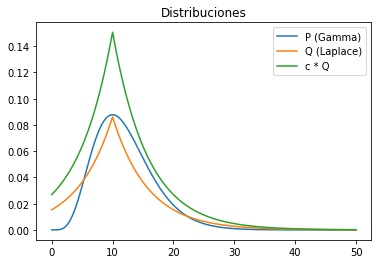

In [17]:
x = np.linspace(0, 50, 1000)
plt.plot(x, P.pdf(x))
plt.plot(x, QL.pdf(x))
plt.plot(x, c * QL.pdf(x))
plt.legend(['P (Gamma)', 'Q (Laplace)', 'c * Q'])
plt.title('Distribuciones')
plt.show()

Como se observa, la distribución Laplace escogida es menor que la Gamma para gran parte del dominio, por lo que se hace pertinente utilizar un escalamiento. Esto se ve reflejado en el $c$ escogido. Se probó con varios entre $1.5$ y $2$, estimando que $1.75$ otorgaba una pseudo distribución que para todo el dominio es mayor que la Gamma, por lo que es adecuada para el procedimiento siguiente.

In [18]:
N = 10000
samples = QL.rvs(size=N)

In [19]:
y = np.random.uniform(0, c * QL.pdf(samples))

In [31]:
accepted = samples[y < P.pdf(samples)]
accepted.size

5801

De las $10000$ muestras obtenidas, se preservan solo aquellas menores a la Gamma, con lo que el tamaño se reduce a menos de $6000$ aproximadamente. 

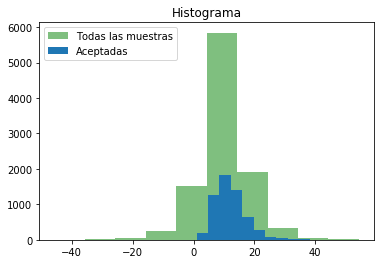

In [32]:
plt.title('Histograma')
plt.hist(samples, alpha=0.5, color='green')
plt.hist(accepted)
plt.legend(['Todas las muestras', 'Aceptadas'])
plt.show()

Se muestran ambos histogramas, el histograma de todas las muestras y el de las aceptadas, y se observa que, donde Laplace era muy alto es donde deberían haber más muestras, y por eso los peaks son más altos, y esto queda de cierto modo "moderado" en el de las aceptadas

Ahora, lo que se va a hacer es mostrar el histograma de las aceptadas pero como una densidad, para que los ejes calcen.

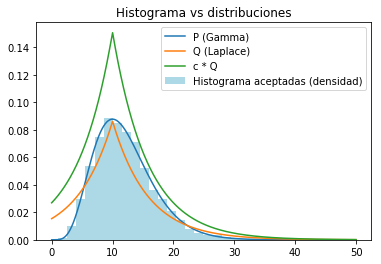

In [34]:
plt.title('Histograma vs distribuciones')
plt.hist(accepted, density=True, color='lightblue', bins=25)
plt.plot(x, P.pdf(x))
plt.plot(x, QL.pdf(x))
plt.plot(x, c * QL.pdf(x))
plt.legend(['P (Gamma)', 'Q (Laplace)', 'c * Q', 'Histograma aceptadas (densidad)'])
plt.show()

Se observa finalmente, que el histograma se ajusta bastante a la Gamma que se quería muestrar, de modo que se muestra la efectividad del método, y la buena elección de $c$. Por completitud se añaden también los otros 2 gráficos, para Laplace y Laplace escalado.